**Importing Libraries**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [ ]:
df =  pd.read_csv("StudentsPerformance.csv")


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df["total"]=df.sum(axis=1)

In [ ]:
df= df.loc[:,["writing score","total"]]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   writing score  1000 non-null   int64
 1   total          1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


**Train And Test Split**

In [ ]:
x_train= np.array(df["writing score"][0:500]).reshape(500,1)
y_train= np.array(df.total[0:500]).reshape(500,1);


x_test= np.array(df["writing score"][500:600]).reshape(100,1)
y_test= np.array(df.total[500:600]).reshape(100,1);



In [ ]:
y_train.shape

(500, 1)

In [ ]:
x_train.shape

(500, 1)

**Importing required Sklearn lib and fitting data**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_regressor= PolynomialFeatures(degree=3)
train_input_poly= poly_regressor.fit_transform(x_train)
poly_regressor.fit(x_train,y_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
train_input_poly 

array([[1.00000e+00, 7.40000e+01, 5.47600e+03, 4.05224e+05],
       [1.00000e+00, 8.80000e+01, 7.74400e+03, 6.81472e+05],
       [1.00000e+00, 9.30000e+01, 8.64900e+03, 8.04357e+05],
       ...,
       [1.00000e+00, 7.60000e+01, 5.77600e+03, 4.38976e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [ ]:
linear_regressor=LinearRegression()
linear_regressor.fit(train_input_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_value= linear_regressor.predict(poly_regressor.fit_transform(x_test))


**Calculating Error**

In [ ]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(predicted_value, y_test)
error

126.5486149162295

**Plotting the Graph-Visualization**

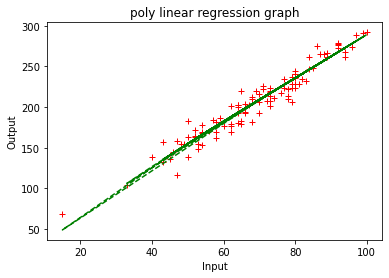

In [ ]:
plt.plot(x_test,y_test,'+',color='red')
plt.plot(x_test,predicted_value,'--',color='green')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title("poly linear regression graph")
plt.show()